In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

In [ ]:
df = pd.read_csv('http://dados.recife.pe.gov.br/dataset/7ccb3816-0d62-49e1-b39a-3159870883b0/resource/bceb5759-5500-49db-bc86-b038892acc06/download/vacinados.csv', delimiter=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df

,faixa_etaria,idade,sexo,raca_cor,municipio,grupo,categoria,lote,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao
0,NaN,NaN,NaN,NaN,NaN,NaN,OUTROS,NaN,NaN,NaN,NaN,NaN,NaN
1,80 a 84 anos,84,MASCULINO,BRANCA,RECIFE,IDOSOS,OUTROS,FG3528,3 - COMIRNATY (PFIZER),3.0,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2021-09-27 00:00:00.0
2,80 a 84 anos,83,MASCULINO,BRANCA,RECIFE,IDOSOS,NaN,210043,1 - CORONAVAC - SINOVAC (BUTANTAN),2.0,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2021-03-07 00:00:00.0
3,80 a 84 anos,83,MASCULINO,BRANCA,RECIFE,IDOSOS,NaN,210013,1 - CORONAVAC - SINOVAC (BUTANTAN),1.0,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2021-02-13 00:00:00.0
4,85 a 89 anos,88,MASCULINO,BRANCA,RECIFE,IDOSOS,NaN,213VCD005W,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),2.0,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2021-04-22 00:00:00.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122812,10 a 14 anos,12,FEMININO,BRANCA,RECIFE,PÚBLICO EM GERAL - MENOR DE 18 ANOS,OUTROS,FM3457,3 - COMIRNATY (PFIZER),1.0,DS 5: CNES: 000701 - MATERNIDADE BANDEIRA FILHO,Conecta Recife,2021-12-09 00:00:00.0
3122813,10 a 14 anos,12,FEMININO,PARDA,RECIFE,PÚBLICO EM GERAL - MENOR DE 18 ANOS,OUTROS,FM3457,3 - COMIRNATY (PFIZER),1.0,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,Conecta Recife,2021-12-13 00:00:00.0
3122814,10 a 14 anos,13,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL - MENOR DE 18 ANOS,OUTROS,FM3457,3 - COMIRNATY (PFIZER),1.0,DS 5: CNES: 000701 - MATERNIDADE BANDEIRA FILHO,Conecta Recife,2021-12-09 00:00:00.0
3122815,25 a 29 anos,25,FEMININO,AMARELA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),NaN,FL4222,3 - COMIRNATY (PFIZER),1.0,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,Conecta Recife,2021-12-27 00:00:00.0


In [ ]:
df = df.loc[df['descricao_dose']==1]

In [ ]:
df

,faixa_etaria,idade,sexo,raca_cor,municipio,grupo,categoria,lote,vacina_fabricante,descricao_dose,cnes,sistema_origem,data_vacinacao
3,80 a 84 anos,83,MASCULINO,BRANCA,RECIFE,IDOSOS,NaN,210013,1 - CORONAVAC - SINOVAC (BUTANTAN),1.0,DS 7: CNES: 0000647 - POLICLINICA CLEMENTINO F...,Conecta Recife,2021-02-13 00:00:00.0
5,85 a 89 anos,87,MASCULINO,BRANCA,RECIFE,IDOSOS,NaN,4120Z005,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),1.0,DS 3: CNES: 000612 - POLICLÍNICA ALBERT SABIN,Conecta Recife,2021-01-27 00:00:00.0
9,80 a 84 anos,80,FEMININO,BRANCA,RECIFE,TRABALHADORES DA SAÚDE,NaN,202009014,1 - CORONAVAC - SINOVAC (BUTANTAN),1.0,DS 6: CNES: 0001392 - MIGUEL DE LIMA VALVERDE.,Conecta Recife,2021-02-08 00:00:00.0
10,90 a 94 anos,90,MASCULINO,BRANCA,RECIFE,IDOSOS,NaN,4120Z005,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),1.0,DS 3: CNES: 000612 - POLICLÍNICA ALBERT SABIN,Conecta Recife,2021-02-07 00:00:00.0
12,85 a 89 anos,85,MASCULINO,PARDA,RECIFE,IDOSOS,NaN,4120Z005,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),1.0,DS 4: CNES: 0000639 - UBS JOAQUIM CAVALCANTE,Conecta Recife,2021-01-29 00:00:00.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122812,10 a 14 anos,12,FEMININO,BRANCA,RECIFE,PÚBLICO EM GERAL - MENOR DE 18 ANOS,OUTROS,FM3457,3 - COMIRNATY (PFIZER),1.0,DS 5: CNES: 000701 - MATERNIDADE BANDEIRA FILHO,Conecta Recife,2021-12-09 00:00:00.0
3122813,10 a 14 anos,12,FEMININO,PARDA,RECIFE,PÚBLICO EM GERAL - MENOR DE 18 ANOS,OUTROS,FM3457,3 - COMIRNATY (PFIZER),1.0,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,Conecta Recife,2021-12-13 00:00:00.0
3122814,10 a 14 anos,13,MASCULINO,BRANCA,RECIFE,PÚBLICO EM GERAL - MENOR DE 18 ANOS,OUTROS,FM3457,3 - COMIRNATY (PFIZER),1.0,DS 5: CNES: 000701 - MATERNIDADE BANDEIRA FILHO,Conecta Recife,2021-12-09 00:00:00.0
3122815,25 a 29 anos,25,FEMININO,AMARELA,RECIFE,PÚBLICO EM GERAL (18 a 59 anos),NaN,FL4222,3 - COMIRNATY (PFIZER),1.0,DS 2: CNES: 6897029 - POLICLÍNICA SALOMÃO KELNER,Conecta Recife,2021-12-27 00:00:00.0


In [ ]:
df = df.drop(['grupo','vacina_fabricante','descricao_dose','cnes','sistema_origem'], axis = 1)

In [ ]:
df = df.drop(['faixa_etaria','idade','raca_cor','categoria','lote','data_vacinacao'], axis = 1)

In [ ]:
df

,sexo,municipio
3,MASCULINO,RECIFE
5,MASCULINO,RECIFE
9,FEMININO,RECIFE
10,MASCULINO,RECIFE
12,MASCULINO,RECIFE
...,...,...
3160564,FEMININO,OLINDA
3160565,FEMININO,JABOATÃO DOS GUARARAPES
3160569,MASCULINO,JABOATÃO DOS GUARARAPES
3160570,FEMININO,RECIFE


In [ ]:
df

,sexo,municipio
3,MASCULINO,RECIFE
5,MASCULINO,RECIFE
9,FEMININO,RECIFE
10,MASCULINO,RECIFE
12,MASCULINO,RECIFE
...,...,...
3160564,FEMININO,OLINDA
3160565,FEMININO,JABOATÃO DOS GUARARAPES
3160569,MASCULINO,JABOATÃO DOS GUARARAPES
3160570,FEMININO,RECIFE


In [ ]:
df = df.drop(['municipio'], axis=1)

In [ ]:
df1 = df
df2 = df

In [ ]:
df1 = df1.loc[df['sexo']=='FEMININO']
df1 = df1.rename(columns={'sexo': 'Feminino'})
df1['femalesum']=1
df1['femalecumsum'] = df1['femalesum'].cumsum()
df1 = df1.drop(['Feminino', 'femalesum'], axis=1)
df1


,femalecumsum
9,1
46,2
50,3
59,4
66,5
...,...
3160563,811224
3160564,811225
3160565,811226
3160570,811227


In [ ]:
df2 = df2.loc[df['sexo']=='MASCULINO']
df2 = df2.rename(columns={'sexo': 'Masculino'})
df2['malesum']=1
df2['malecumsum'] = df2['malesum'].cumsum()
df2 = df2.drop(['Masculino', 'malesum'], axis=1)
df2

,malecumsum
3,1
5,2
10,3
12,4
15,5
...,...
3160546,630375
3160547,630376
3160553,630377
3160554,630378


In [ ]:
newdf = pd.concat([df1, df2], axis=1)

In [ ]:
newdf = newdf.fillna(0.0).astype(int)

In [ ]:
newdf

,femalecumsum,malecumsum
3,0,1
5,0,2
9,1,0
10,0,3
12,0,4
...,...,...
3122812,775083,0
3122813,775084,0
3122814,0,604511
3122815,775085,0


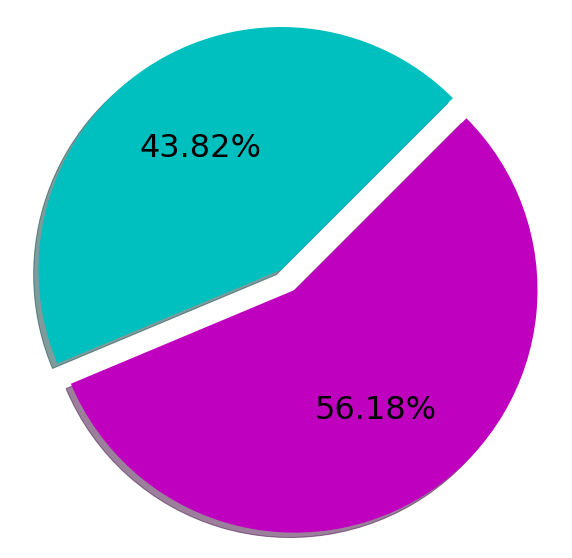

In [ ]:
labels = 'Homens', 'Mulheres'
colors = ['c', 'm']
sizes = [604511,775086]
explode = (0.05,0.05)
fig1, ax1 = plt.subplots(figsize = (10,10))
fig1.subplots_adjust(wspace=0)
ax1.pie(sizes, autopct='%2.2f%%',
        shadow=True, startangle=45, colors = colors, textprops={'fontsize': 32},explode = explode)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()